# Data Cleaning with Pandas

The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

Here is the Data Dictionary for this dataset:

**Variable Name	Description**  
*Item_Identifier*	Unique product ID  
*Item_Weight*	Weight of product  
*Item_Fat_Content*	Whether the product is low fat or regular  
*Item_Visibility*	The percentage of total display area of all products in a store allocated to the particular product  
*Item_Type*	The category to which the product belongs  
*Item_MRP*	Maximum Retail Price (list price) of the product  
*Outlet_Identifier*	Unique store ID  
*Outlet_Establishment_Year*	The year in which store was established  
*Outlet_Size*	The size of the store in terms of ground area covered  
*Outlet_Location_Type*	The type of area in which the store is located  
*Outlet_Type*	Whether the outlet is a grocery store or some sort of supermarket  
*Item_Outlet_Sales*	Sales of the product in the particular store. This is the target variable to be predicted.  

Data that could be useful to find out:

*Item Visibility & Item Type* (What kind of items are more displayed to the customer?)  
*Item MRP & Item Visibility* (What price is the most visible of an item?)  
*Item Visibility & Outlet Sales* (How visibly will an item directly affects total sales?)  
*Item MRP & Outlet Sales* (Do lower priced items sell more than higher?)  
*Outlet Type and Outlet Sales* (How much sale value does a specific outlet type get? (Which is more profitable?))  
*Outlet Size and Outlet Sales* (Does the size of the building affect the total outlet sales?)  

In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [286]:
df = pd.read_csv('C:/Users/yanni/Documents/GitHub/sales-predictions/Excel/sales_predictions.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [287]:
df.info() # Here I can see that Item_Weight, and Outlet_Size have some null counts. These need to be addressed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [288]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## These next few lines are dissecting the data that's been given, and seeing what vaules are actually missing.

In [289]:
MissingOutletSize = df.loc[df['Outlet_Size'].isna()]['Outlet_Identifier'].unique() # this helps us check and see what outlets have missing outlet size catagories
MissingOutletSize

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

In [290]:
# This gives us all items aggregate performance at stores.
AggregatedItemSales = df.groupby(['Item_Identifier'])[['Item_Outlet_Sales']].sum().sort_values('Item_Outlet_Sales', ascending = False)
AggregatedItemSales

,Item_Outlet_Sales
Item_Identifier,
FDY55,42661.8008
FDA15,41584.5364
FDZ20,40185.0248
FDF05,36555.7490
FDA04,35741.4756
...,...
FDQ04,784.3124
FDF38,771.6622
FDY43,673.7896


This is showing us our highest priced items.

<BarContainer object of 50 artists>

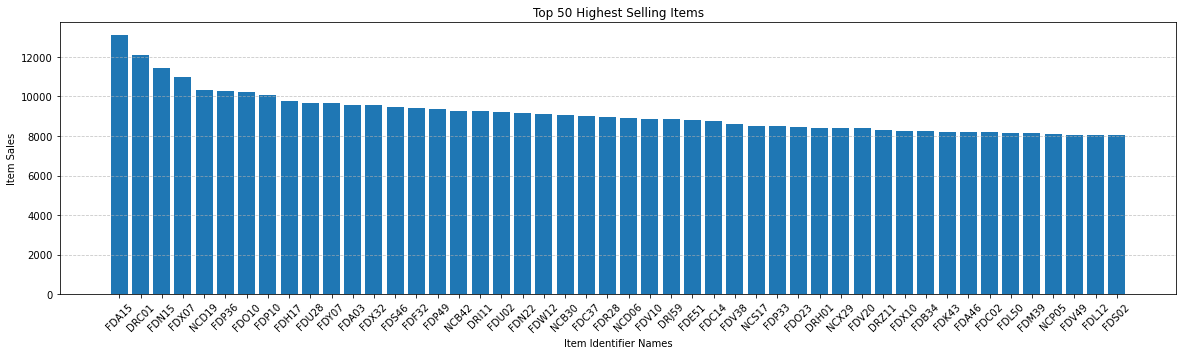

In [291]:
Items = df['Item_Identifier'].head(50)
OutletSales = df['Item_Outlet_Sales'].sort_values(ascending = False).head(50)
plt.figure(figsize=(20,5))
plt.grid(axis = 'y', linestyle='--', alpha=.7)
plt.xticks(rotation=45)
plt.xlabel('Item Identifier Names')
plt.ylabel('Item Sales')
plt.title('Top 50 Highest Selling Items')
plt.bar(Items, OutletSales)

In [292]:
df.sort_values(by=['Outlet_Identifier', 'Outlet_Size'], ascending = False)[['Outlet_Identifier', 'Outlet_Size']] # This shows us ONLY our Outlet_Size and Outlet_Identifier

,Outlet_Identifier,Outlet_Size
0,OUT049,Medium
2,OUT049,Medium
10,OUT049,Medium
12,OUT049,Medium
17,OUT049,Medium
...,...,...
8400,OUT010,NaN
8432,OUT010,NaN
8473,OUT010,NaN
8486,OUT010,NaN


## Item Visibility & Item Type (What kind of items are more displayed to the customer?)

This is telling us that the most displayed items are *canned items, household items, fruits and vegtables, baking goods, soft drinks, dairy, snack foods, hard drinks, and frozen foods.*

In [293]:
ItemViz_ItemType = df.groupby(['Item_Type'])[['Item_Visibility']].max().sort_values('Item_Visibility', ascending = False)
ItemViz_ItemType

,Item_Visibility
Item_Type,
Canned,0.328391
Household,0.325781
Fruits and Vegetables,0.321115
Baking Goods,0.311090
Soft Drinks,0.306543
Dairy,0.304737
Snack Foods,0.303743
Hard Drinks,0.298205
Frozen Foods,0.294939


This is showing our highest displayed items. *Need to look into revising this. Numpy doesn't like if I put .max() so I can't see the max values of a graph. Rather, this is just a huge average.*

<BarContainer object of 8523 artists>

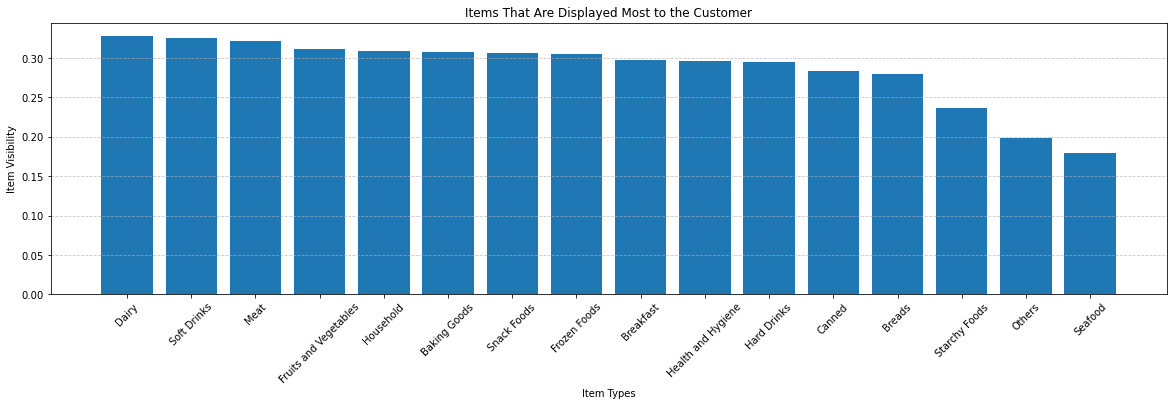

In [294]:
ItemType = df['Item_Type']
ItemVisibility = df['Item_Visibility'].sort_values(ascending = False)
plt.figure(figsize=(20,5))
plt.grid(axis = 'y', linestyle='--', alpha=.7)
plt.xticks(rotation=45)
plt.xlabel('Item Types')
plt.ylabel('Item Visibility')
plt.title('Items That Are Displayed Most to the Customer')
plt.bar(ItemType, ItemVisibility)
# df.info()

## Item Visibility & Outlet Sales (How visibly will an item directly affect total sales?)

This is showing us that there might be a correlation with high visibility items and sale counts for vaules over 0.06 visibility as the outlet sales are higher in this area.

In [295]:
df.sort_values('Item_Outlet_Sales').head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
906,DRK12,9.500,Low Fat,0.000000,Soft Drinks,32.8900,OUT010,1998,NaN,Tier 3,Grocery Store,33.2900
6950,NCR42,9.105,Low Fat,0.064411,Household,33.3900,OUT010,1998,NaN,Tier 3,Grocery Store,33.2900
2571,FDU21,NaN,Regular,0.134328,Snack Foods,35.0558,OUT019,1985,Small,Tier 1,Grocery Store,33.9558
3053,NCL41,NaN,Low Fat,0.073077,Health and Hygiene,34.3216,OUT019,1985,Small,Tier 1,Grocery Store,34.6216
7388,FDQ47,7.155,Regular,0.281510,Breads,33.8874,OUT010,1998,NaN,Tier 3,Grocery Store,35.2874


In [296]:
Items = df['Item_Visibility'] >= 0.06
Sales = df['Item_Outlet_Sales'] >= 2100
ItemVisandOutletSales = df.loc[Items & Sales]
ItemVisandOutletSales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
19,FDU02,13.35,Low Fat,0.102492,Dairy,230.5352,OUT035,2004,Small,Tier 2,Supermarket Type1,2748.4224
20,FDN22,18.85,Regular,0.138190,Snack Foods,250.8724,OUT013,1987,High,Tier 3,Supermarket Type1,3775.0860
31,NCS17,18.60,Low Fat,0.080829,Health and Hygiene,96.4436,OUT018,2009,Medium,Tier 3,Supermarket Type2,2741.7644
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.42,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8504,NCN18,NaN,Low Fat,0.124111,Household,111.7544,OUT027,1985,Medium,Tier 3,Supermarket Type3,4138.6128
8505,FDB46,10.50,Regular,0.094146,Snack Foods,210.8244,OUT018,2009,Medium,Tier 3,Supermarket Type2,2117.2440
8506,DRF37,17.25,Low Fat,0.084676,Soft Drinks,263.1910,OUT018,2009,Medium,Tier 3,Supermarket Type2,3944.8650


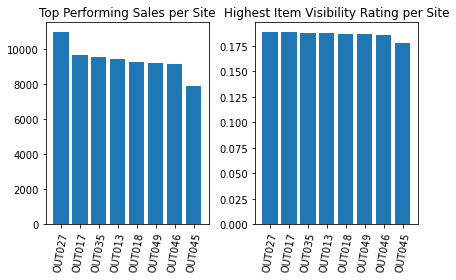

In [332]:
TenViz = ItemVisandOutletSales['Item_Visibility'].mean()
TenSales = ItemVisandOutletSales['Item_Outlet_Sales'].mean()
# OutletIde = df['Outlet_Identifier']
plt.subplot(1,2,1);
plt.bar(ItemVisandOutletSales['Outlet_Identifier'], ItemVisandOutletSales['Item_Outlet_Sales'].sort_values(ascending = False));
plt.xticks(rotation = 80);
plt.title('Top Performing Sales per Site')

plt.subplot(1,2,2);
plt.bar(ItemVisandOutletSales['Outlet_Identifier'], ItemVisandOutletSales['Item_Visibility'].sort_values(ascending = False));
plt.xticks(rotation=80);
plt.title('Highest Item Visibility Rating per Site');
plt.tight_layout()

## Item MRP & Outlet Sales (Do lower priced items sell more than higher?)

This shows us the amount of total sales for Item MRPs that were lower and higher than the mean of 140.

In [298]:
Lower = df['Item_MRP'] <= 140 # This compares the mean vaule of the low and high of MRP to get a good idea.
Higher = df['Item_MRP'] >= 140
SalesLessThan140 = df.loc[Lower & Sales]
SalesGreaterThan140 = df.loc[Higher & Sales]

In [299]:
len(SalesLessThan140)

793

In [300]:
len(SalesGreaterThan140)

2875

## Outlet Type and Outlet Sales (How much sale value does a specific outlet type get? (Which is more profitable?))

This tells us the max profitable vaule off of a certain type of item type from a certain outlet type.

In [301]:
df.groupby(['Outlet_Type', 'Item_Type'])[['Item_Outlet_Sales']].max()

Item_Outlet_Sales
Outlet_Type       Item_Type                       
Grocery Store     Baking Goods            792.3020
                  Breads                 1524.0162
                  Breakfast              1094.5752
                  Canned                 1324.9420
                  Dairy                  1314.9550
...                                            ...
Supermarket Type3 Others                 5546.1140
                  Seafood                5704.5744
                  Snack Foods           10993.6896
                  Soft Drinks            9554.2300
                  Starchy Foods          7443.6440

[64 rows x 1 columns]

## Outlet Size and Outlet Sales (Does the size of the building affect the total outlet sales?)

This shows that our most profitable buildings to invest in might be Medium Tier 1, Tier 3, and High Tier 3 buildings. This might have to be factored in with SME data from the building cost averaged per outlet size.

In [302]:
df.groupby(['Outlet_Size', 'Outlet_Location_Type'])[['Item_Outlet_Sales']].max()

Item_Outlet_Sales
Outlet_Size Outlet_Location_Type                   
High        Tier 3                       10256.6490
Medium      Tier 1                        7646.0472
            Tier 3                       13086.9648
Small       Tier 1                        9779.9362
            Tier 2                        8479.6288